In [1]:
import pandas as pd


employee_df = pd.read_csv('Employee.csv')

In [2]:
print("\nDataset Info:\n")
print(employee_df.info())




Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB
None


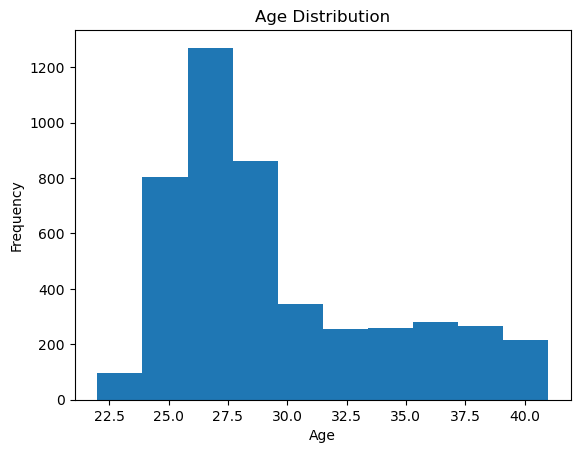

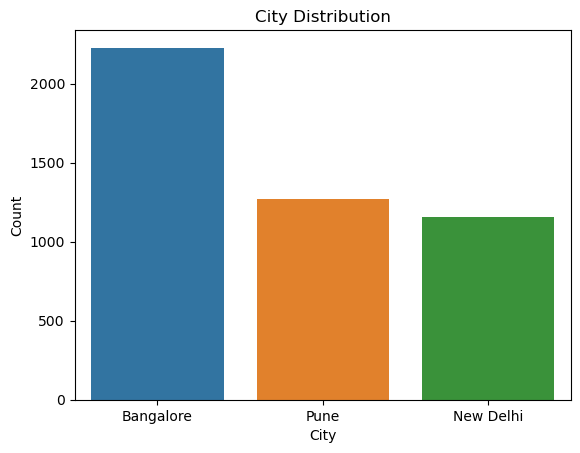

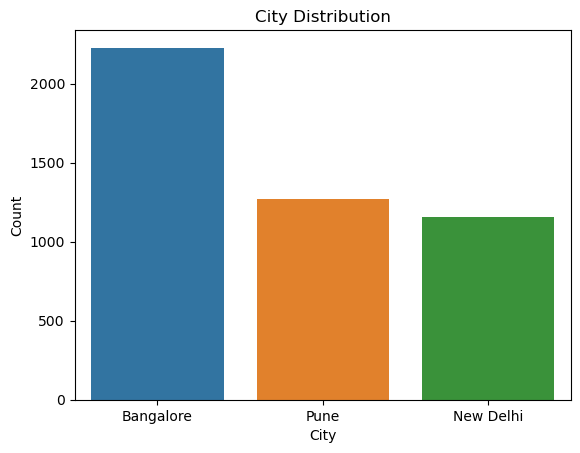

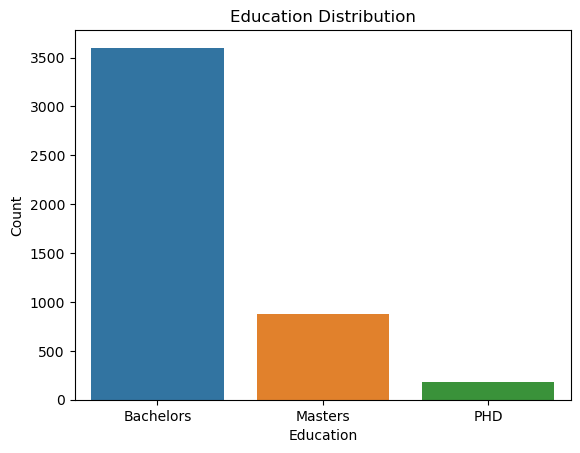

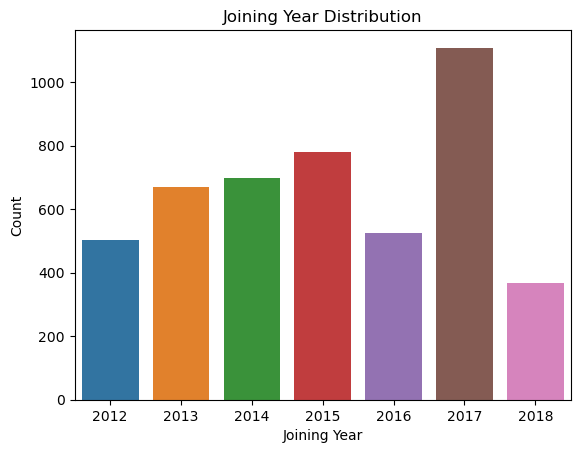

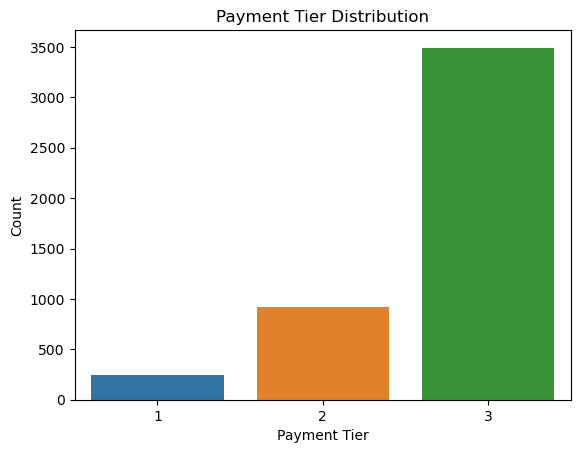

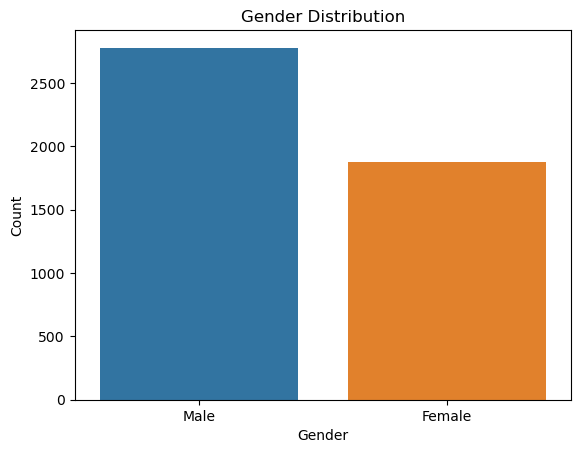

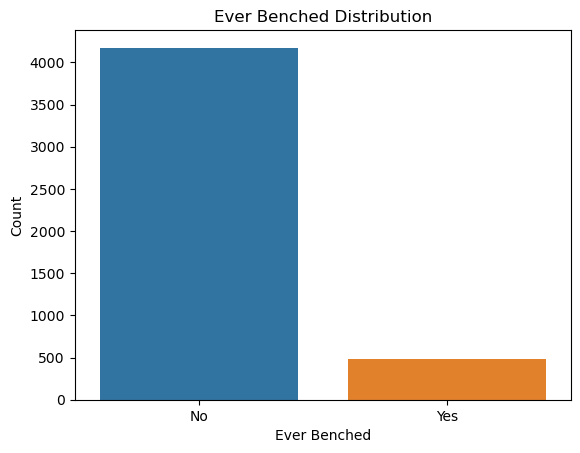

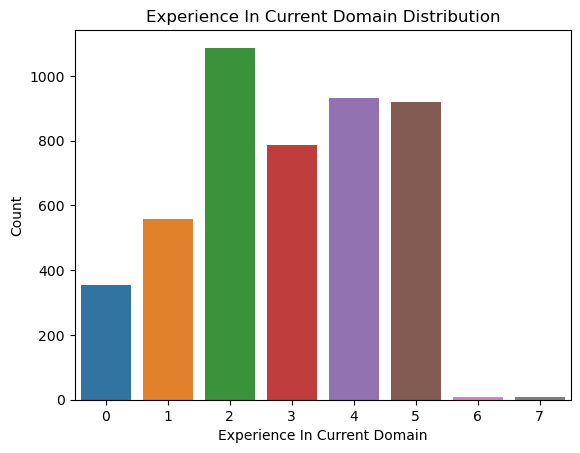

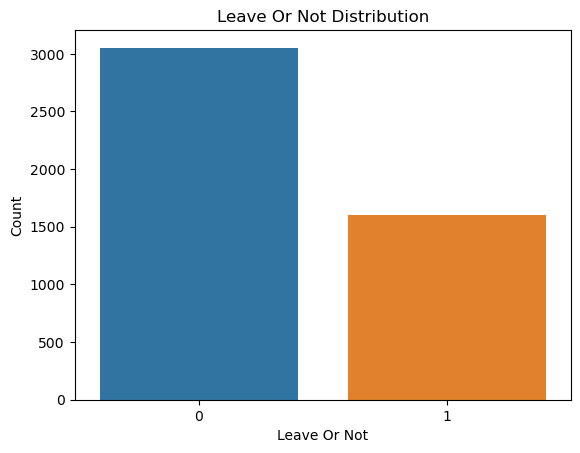

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of ages
plt.hist(employee_df['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

# Bar chart of departments
sns.countplot(x='City', data=employee_df)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('City Distribution')
plt.show()


sns.countplot(x='City', data=employee_df)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('City Distribution')
plt.show()


# Education
sns.countplot(x='Education', data=employee_df)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Distribution')
plt.show()

# JoiningYear
sns.countplot(x='JoiningYear', data=employee_df)
plt.xlabel('Joining Year')
plt.ylabel('Count')
plt.title('Joining Year Distribution')
plt.show()


# PaymentTier
sns.countplot(x='PaymentTier', data=employee_df)
plt.xlabel('Payment Tier')
plt.ylabel('Count')
plt.title('Payment Tier Distribution')
plt.show()

# Gender
sns.countplot(x='Gender', data=employee_df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

# EverBenched
sns.countplot(x='EverBenched', data=employee_df)
plt.xlabel('Ever Benched')
plt.ylabel('Count')
plt.title('Ever Benched Distribution')
plt.show()

# ExperienceInCurrentDomain
sns.countplot(x='ExperienceInCurrentDomain', data=employee_df)
plt.xlabel('Experience In Current Domain')
plt.ylabel('Count')
plt.title('Experience In Current Domain Distribution')
plt.show()

# LeaveOrNot
sns.countplot(x='LeaveOrNot', data=employee_df)
plt.xlabel('Leave Or Not')
plt.ylabel('Count')
plt.title('Leave Or Not Distribution')
plt.show()





In [4]:
employee_df = employee_df.dropna()

print(employee_df.isnull().sum())


Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64


In [10]:
employee_df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


C:\Users\User\AppData\Local\Temp\ipykernel_29632\44836749.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'Education'] = le.fit_transform(X['Education'])
C:\Users\User\AppData\Local\Temp\ipykernel_29632\44836749.py:20: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, 'Education'] = le.fit_transform(X['Education'])
C:\Users\User\AppData\Local\Temp\ipykernel_29632\44836749.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

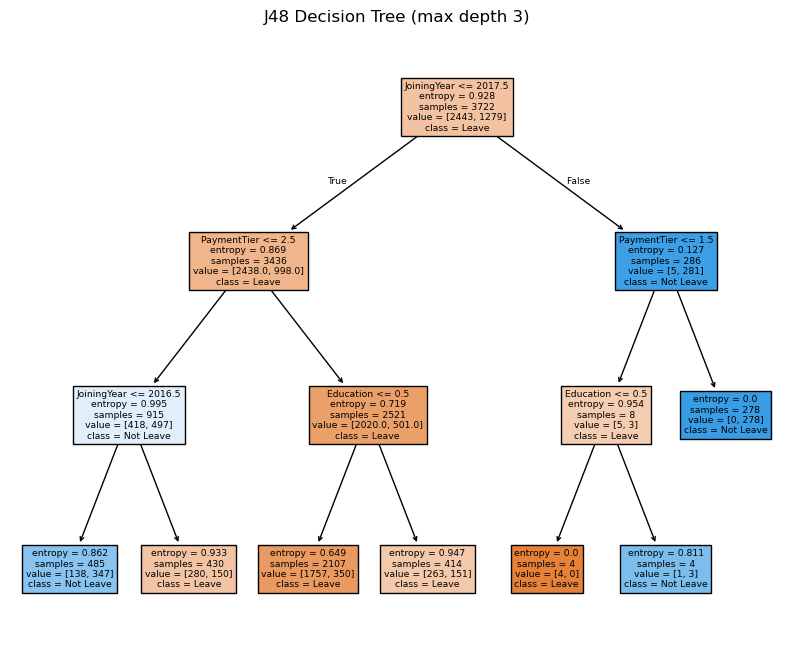

J48 Decision Tree Accuracy: 0.803
J48 Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       610
           1       0.83      0.54      0.66       321

    accuracy                           0.80       931
   macro avg       0.81      0.74      0.76       931
weighted avg       0.81      0.80      0.79       931



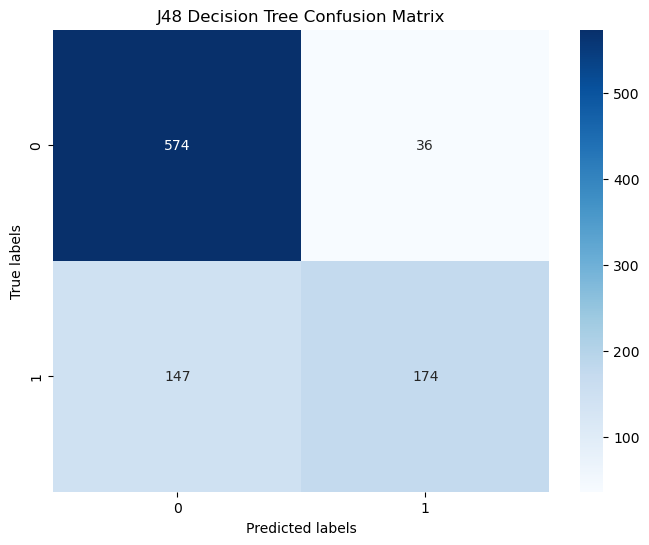

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load the data
df = pd.read_csv('Employee.csv')

sumall = df.count()

# Define the feature columns (X) and the target column (y)
X = df[['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender', 'EverBenched', 'ExperienceInCurrentDomain']]
y = df['LeaveOrNot']

# Encode categorical features using LabelEncoder
le = LabelEncoder()
X.loc[:, 'Education'] = le.fit_transform(X['Education'])
X.loc[:, 'City'] = le.fit_transform(X['City'])
X.loc[:, 'Gender'] = le.fit_transform(X['Gender'])
X.loc[:, 'EverBenched'] = le.fit_transform(X['EverBenched'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

# Train a J48 Decision Tree classifier with max depth 3
j48_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)
j48_classifier.fit(X_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(10, 8))
plot_tree(j48_classifier, feature_names=X.columns, class_names=['Leave', 'Not Leave'], filled=True)
plt.title("J48 Decision Tree (max depth 3)")
plt.show()

# Make predictions on the testing data
y_pred_j48 = j48_classifier.predict(X_test)

# Evaluate the J48 Decision Tree classifier
accuracy_j48 = accuracy_score(y_test, y_pred_j48)
print("J48 Decision Tree Accuracy: {:.3f}".format(accuracy_j48))
print("J48 Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_j48))

# Plot the confusion matrix using seaborn
conf_mat_j48 = confusion_matrix(y_test, y_pred_j48)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_j48, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("J48 Decision Tree Confusion Matrix")
plt.show()


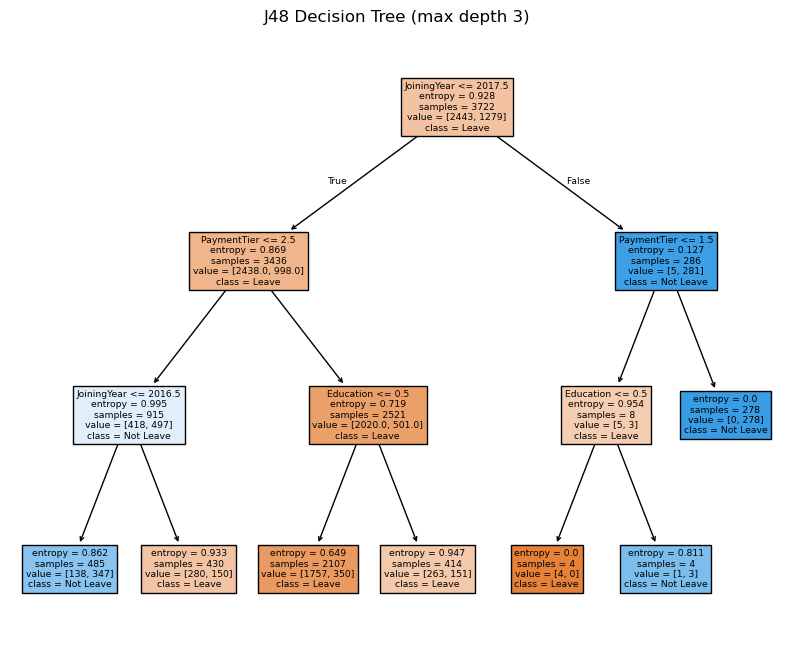

In [6]:
# Plot the Decision Tree
plt.figure(figsize=(10, 8))
plot_tree(j48_classifier, feature_names=X.columns, class_names=['Leave', 'Not Leave'], filled=True)
plt.title("J48 Decision Tree (max depth 3)")
plt.show()

# Make predictions on the testing data
y_pred_j48 = j48_classifier.predict(X_test)

In [7]:
# Evaluate the J48 Decision Tree classifier
accuracy_j48 = accuracy_score(y_test, y_pred_j48)
print("J48 Decision Tree Accuracy: {:.3f}".format(accuracy_j48))
print("J48 Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_j48))

J48 Decision Tree Accuracy: 0.803
J48 Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       610
           1       0.83      0.54      0.66       321

    accuracy                           0.80       931
   macro avg       0.81      0.74      0.76       931
weighted avg       0.81      0.80      0.79       931



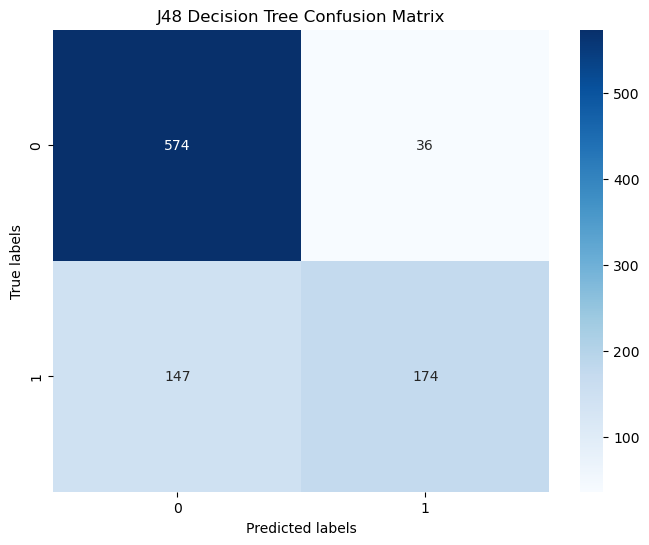

In [8]:
# Plot the confusion matrix using seaborn
conf_mat_j48 = confusion_matrix(y_test, y_pred_j48)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_j48, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("J48 Decision Tree Confusion Matrix")
plt.show()

In [9]:
import numpy as np

x_new = [0,0]
X_old = [3,3]
learning_rate = 0.1

for i in range(2):
    
    loss = np.


SyntaxError: invalid syntax (657959274.py, line 9)